# Wegobuy Data Analysis (updated hourly)

In [48]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [49]:
# display prep
def show(data):
    html = '<ul>'
    for line in data:
        html += '<li>' + line + '</li>'
    html += '</ul>'
    return HTML(html)

In [50]:
# data prep
data_file = 'data-final.csv'
df = pd.read_csv(data_file)
for col in ['goodsOrderTime', 'createTime', 'updateTime']:
    df[col] = pd.to_datetime(df[col], unit='s')

### Basic Info

In [51]:
data = []
data.append(f'Number of columns: {len(df.columns)}')
data.append(f'Number of items: {len(df)}')
data.append(f'Date range: {df["goodsOrderTime"].min()} to {df["goodsOrderTime"].max()}')
show(data)

### Notable Items

In [52]:
data = []
data.append(f"The most popular item was <a href='{df['goodsLink'].value_counts().idxmax()}'>{df['goodsLink'].value_counts().idxmax()}</a>, which was purchased {df['goodsLink'].value_counts().max()} times.")
data.append(f'The most expensive item was <a href="{df.loc[df["goodsPrice"].idxmax()]["goodsLink"]}">{df.loc[df["goodsPrice"].idxmax()]["goodsLink"]}</a>, which cost {df["goodsPrice"].max()} yuan')
show(data)

### Notable Users

In [53]:
def get_biggest_spender():
    # yep
    users = {}
    for row in df.iterrows():
        if row[1]["buyerName"] not in users:
            users[row[1]["buyerName"]] = 0
        users[row[1]["buyerName"]] += row[1]["goodsPrice"]
    biggest = ('', 0)
    for u in users:
        if users[u] > biggest[1]:
            biggest = (u, users[u])
    return biggest
data = []
data.append(f'{df["buyerName"].mode()[0]} from {df[df["buyerName"] == df["buyerName"].mode()[0]]["countryCode"].iloc[0]} purchased the most items, {len(df[df["buyerName"] == df["buyerName"].mode()[0]])} items for a total of {df[df["buyerName"] == df["buyerName"].mode()[0]]["goodsPrice"].sum()} yuan')
data.append(f'The most popular country was {df["countryCode"].mode()[0]}')
biggest_spender = get_biggest_spender()
data.append(f'{biggest_spender[0]} from {df.loc[df["buyerName"] == biggest_spender[0]]["countryCode"].iloc[0]} spend the most money, {biggest_spender[1]} yuan on {len(df.loc[df["buyerName"] == biggest_spender[0]]["goodsPrice"])} items')
show(data)

### Pretty Pictures

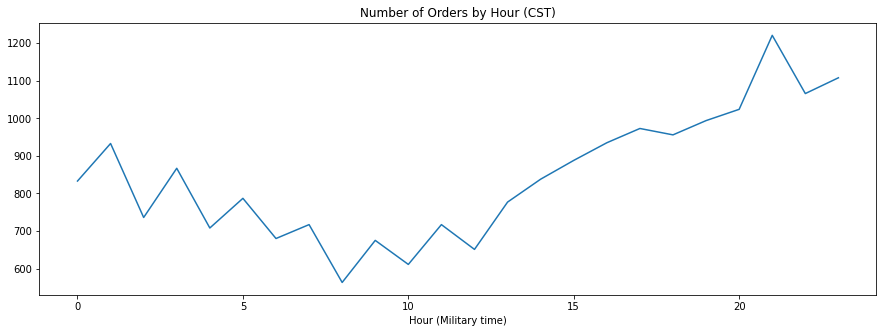

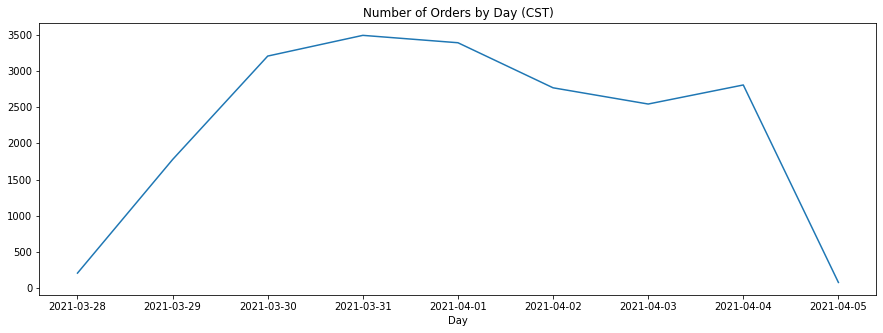

In [54]:
df.groupby(df['goodsOrderTime'].rename('Hour (Military time)').dt.hour).size().plot(title='Number of Orders by Hour (CST)', figsize=(15,5))
plt.show()
df.groupby(df['goodsOrderTime'].rename('Day').dt.date).size().plot(
    title='Number of Orders by Day (CST)', figsize=(15,5))
plt.show()